In [34]:
import sys

# laptop
sys.path.append( '/home/greg/current/NMEG_utils/py_modules/' )
af_path = '/home/greg/sftp/eddyflux/Ameriflux_files/provisional/'
fig_path = '../figures/multiyear_figs/'
# UNM desktop
#sys.path.append( '..\\NMEG_utils\\py_modules\\' )
#af_path = 'C:\\Research_Flux_Towers\\Ameriflux_files\\'
#fig_path = 'figures\\multiyear_figs\\'

import load_nmeg as ld
import transform_nmeg as tr
import plot_nmeg as nmegplt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import ipdb as ipdb

%matplotlib inline
sns.set_style("white")

In [35]:
# Years to load
start = 2007
end = 2014
# Sites to load (pulls list of AF sites from plot_nmeg module)
sites = ['Seg', 'Sen']
# Fill a dict with multiyear dataframes for each site in sites
hourly = { x : 
          ld.get_multiyr_aflx( 'US-' + x, af_path, gapfilled=True, startyear=start, endyear=end) 
          for x in sites }

Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2007_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2008_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2009_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2013_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Seg_2014_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Sen_2010_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Sen_2011_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_files/provisional/US-Sen_2012_gapfilled.txt
Parsing /home/greg/sftp/eddyflux/Ameriflux_

In [36]:
daily = { x : 
         tr.resample_30min_aflx( hourly[x], freq='1D', 
                                c_fluxes=[ 'GPP', 'RECO', 'FC_F' ], 
                                le_flux=[ 'LE_F' ], 
                                avg_cols=[ 'TA_F', 'RH_F', 'SW_IN_F', 'RNET', 'VPD_F' ], 
                                sum_cols=[ 'P_F' ] , tair_col='TA_F' ) 
         for x in hourly.keys() }
d = pd.Panel(daily)

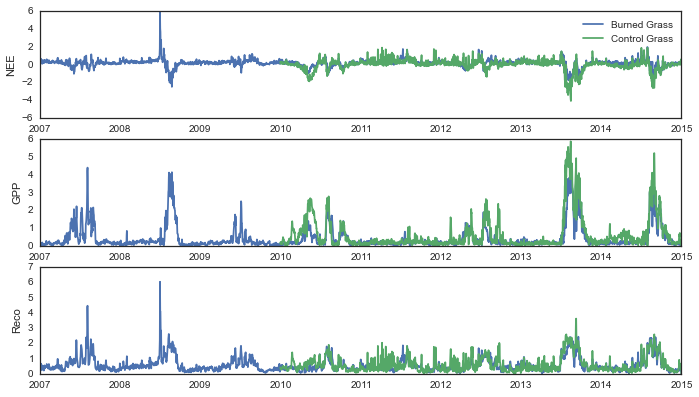

In [37]:
fig1 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, d.Seg.FC_F_g_int)
ax.plot(d.Seg.index, d.Sen.FC_F_g_int)
ax.set_ylabel('NEE')
plt.legend(['Burned Grass', 'Control Grass'])
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, d.Seg.GPP_g_int)
ax.plot(d.Seg.index, d.Sen.GPP_g_int)
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, d.Seg.RECO_g_int)
ax.plot(d.Seg.index, d.Sen.RECO_g_int)
ax.set_ylabel('Reco')


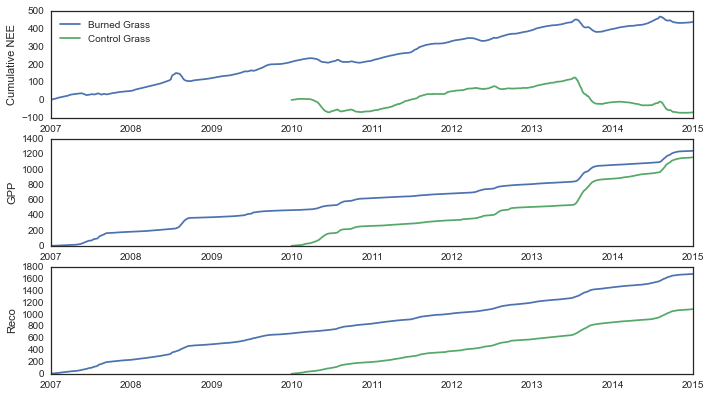

In [38]:
fig2 = plt.figure(figsize=( 11.5, 6.5 ), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(3, 1, 1)
ax.plot(d.Seg.index, np.cumsum(d.Seg.FC_F_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.FC_F_g_int))
ax.set_ylabel('Cumulative NEE')
plt.legend(['Burned Grass', 'Control Grass'], loc='upper left')
ax = plt.subplot(3, 1, 2)
ax.plot(d.Seg.index, np.cumsum(d.Seg.GPP_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.GPP_g_int))
ax.set_ylabel('GPP')
ax = plt.subplot(3, 1, 3)
ax.plot(d.Seg.index, np.cumsum(d.Seg.RECO_g_int))
ax.plot(d.Seg.index, np.cumsum(d.Sen.RECO_g_int))
ax.set_ylabel('Reco')